In [1]:
%load_ext autoreload
%autoreload 2

root = r"C:\Users\zwecher\Documents\mygit\new_predictor"
#predictor_path  = r"C:\Users\zwecher\Documents\mygit\Indoors_Capabilities\predictor"
#model_path = r"C:\Users\zwecher\Documents\mygit\Indoors_Capabilities\models"

from importlib import reload  # Not needed in Python 2
import logging
reload(logging)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import backend as K 

from tensorflow import keras
import sys, os
sys.path.insert(0,root)
#from predictor import predictor, config, restore
import utils
from predictor import buildings_predictor as bp
from predictor import batch_manager
from predictor import full_model_predictor as fmp
from predictor import config
utils.set_log()
os.chdir(r"C:\Users\zwecher\Documents\mygit\new_predictor\predictor")

C:\Users\zwecher\AppData\Local\Continuum\anaconda3\envs\keras\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zwecher\AppData\Local\Continuum\anaconda3\envs\keras\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zwecher\AppData\Local\Continuum\anaconda3\envs\keras\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([


2019-12-04 14:11:42,439 [INFO: __init__.py 23] path: ..\logs


In [2]:
K.clear_session()
model = fmp.get_conv_model()


2019-12-04 14:15:28,737 [INFO: full_model_predictor.py 47] 96
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
obs (InputLayer)                [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, 96, 96, 25)   250         obs[0][0]                        
__________________________________________________________________________________________________
max_pool_2d_0 (MaxPooling2D)    (None, 48, 48, 25)   0           conv_0[0][0]                     
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 48, 48, 25)   5650        max_pool_2d_0[0][0]              
_______________________________

In [4]:
model.load_weights(r"C:\Users\zwecher\Documents\mygit\new_predictor\models\models_6260_conv\model-20-0.1013.hdf5")

In [ ]:
fmp.train_model(model,40, batch_size=128)

In [ ]:
#model.save(r"C:\Users\zwecher\Documents\mygit\new_predictor\models\models_6260_dense\model-01-0.2856.hdf5")

In [6]:
metadata_df = batch_manager.create_metadata_df()
bm = batch_manager.BatchManager(metadata_df,test_num=256)
x_test,y_test  =  bm.get_test_batch()
func= utils.get_inermediate_layers_func(model, ["obs","last_conv","flat","loss_for_logits","lab","mask","masked_loss"])
obs,last_conv, logits,loss_for_logits,labels,mask,masked_loss= func((x_test,y_test))

<IPython.core.display.Javascript object>


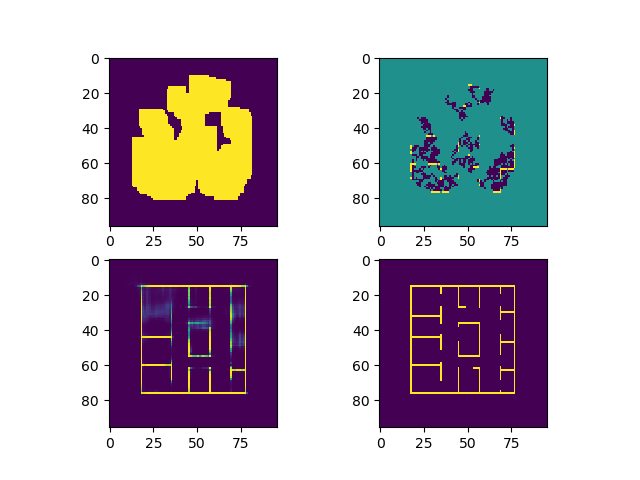

In [9]:
l = [226,15,14,53,75]
i=15
%matplotlib notebook
plt.subplot(221)
plt.imshow(mask[i].reshape(config.HEIGHT,config.WIDTH))
plt.subplot(222)
plt.imshow(obs[i].reshape(config.HEIGHT,config.WIDTH))
plt.subplot(223)
plt.imshow((utils.logits_to_probs(logits[i])).reshape(config.HEIGHT,config.WIDTH))
plt.subplot(224)
plt.imshow(labels[i].reshape(config.HEIGHT,config.WIDTH))



In [ ]:
pd.Series(mask.mean(axis = 1)).sort_values(ascending = False)

In [ ]:
mask.shape

In [ ]:
%matplotlib notebook
plt.hist(logits.flatten(),bins=100)

In [ ]:
i=80
%matplotlib notebook
plt.subplot(121)
plt.imshow(obs[i].reshape(92,90))
for k in range(1):
    plt.subplot(122)
    plt.imshow(convs[k][i,:,:,0].squeeze())
# plt.subplot(222)
# plt.imshow(obs[i].reshape(92,90))
# plt.subplot(223)
# plt.imshow(utils.logits_to_probs(logits[i]).reshape(92,90))
# plt.subplot(224)
# plt.imshow(labels[i].reshape(92,90))

In [ ]:
%matplotlib notebook
plt.imshow(x_test[0][0].squeeze())

In [ ]:
pd.Series(y_test[0].flatten()).value_counts()

In [ ]:
#func = utils.get_inermediate_layers_func(model,["flatten"])
for i in range(20):
    x,y=  bm.get_next_train_batch(256)
   
    model.train_on_batch(x,y)
    if i%1 == 0:
        loss = model.evaluate(x_test,y_test)
        print(loss)

In [ ]:
%matplotlib notebook
func= utils.get_inermediate_layers_func(model, ["obs","last_conv","logits","loss_for_logits","lab","mask","masked_loss"])
obs,last_conv, logits,loss_for_logits,labels,mask,masked_loss= func((x_test,y_test))
# for i in range(7):
#     convs.append("conv_{}".format(i))
# func= utils.get_inermediate_layers_func(model, convs)    
# convs = func((x_test,y_test))
# #plt.hist(q[0].flatten(),bins=1000)


In [ ]:
i=72
%matplotlib notebook
plt.subplot(131)
plt.imshow(obs[i].squeeze())
plt.subplot(132)
plt.imshow(last_conv[i].squeeze())
plt.subplot(133)
plt.imshow(labels[i].reshape((82,80)))



In [ ]:
pd.Series(mask.flatten()).value_counts()

In [ ]:
mask.shape

In [ ]:
%matplotlib notebook
pd.Series(labels[0]).value_counts()

In [ ]:
(y_test[0]==0).sum()

In [ ]:
model.get_losses_for([x_test])

In [ ]:
convs[0].shape

In [ ]:
%matplotlib notebook
plt.hist(logits[100].flatten(),bins=100)

In [ ]:
bp.train_model(model,1)

In [ ]:
#bp.train_model(model,3)
model.save_weights(r"C:\Users\zwecher\Documents\mygit\new_predictor\models\models_6260\model_tmp.hdf5")

In [ ]:
q = tf.keras.models.load_model(r"C:\Users\zwecher\Documents\mygit\new_predictor\models\models_6260\model_tmp.hdf5",compile=False)


In [ ]:
q = tf.keras.models.load_model(r"C:\Users\zwecher\Documents\mygit\new_predictor\models\models_6260\model-01-0.3287.hdf5",compile=False)
ao = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = fmp.loss
q.compile(optimizer=ao, loss=loss)
#func = utils.get_inermediate_layers_func(q,["dense"])

In [ ]:
func = utils.get_inermediate_layers_func(model,["dense"])
v=func(x)

In [ ]:
v[0].shape

In [ ]:
f=model.get_layer("bn")

In [ ]:
f.get_weights()

In [ ]:
func = utils.get_inermediate_layers_func(model,["flatten"])
v=func(x_test)

In [ ]:
%matplotlib notebook
i=80
plt.subplot(131)
plt.imshow(utils.logits_to_probs(v[0][i]).reshape(62,60))
plt.subplot(132)
plt.imshow(x_test[i].squeeze())
plt.subplot(133)
plt.imshow(y_test[i].reshape(62,60))


In [ ]:
%matplotlib notebook
plt.hist(v[0].flatten(),bins=1000)

In [ ]:
3+4

In [ ]:
q.compile()

In [ ]:
model.get_config()

In [ ]:
(v[0]<0).mean()

In [ ]:
%matplotlib tk
plt.hist(v[0][0].flatten())

In [ ]:
from datetime import datetime


In [ ]:
datetime.now()-datetime(2017,2,6)

In [ ]:
q = np.random.randn(5,6,7)
l = tf.keras.layers.Conv2D(q,kernel_size=10,kernel_initializer="ones")

In [ ]:
l.

In [ ]:
import cv2

In [ ]:
%matplotlib notebook
im = labels[0].reshape(62,60)
plt.imshow(cv2.resize(im,(21,20)))

In [ ]:
pd.Series(cv2.resize(im,(30,30)).flatten()).value_counts()

In [ ]:
config = model.get_config()
reinitialized_model = keras.Model.from_config(config)

In [ ]:
1.02**20
